# Projeto para predição do preço de casas utilizando regressão linear

Dataset utilizado: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction

## Importando as bibliotecas

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importando os dados

In [49]:
dados = pd.read_csv('Housing.csv')
dados.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Verificando os dados

In [50]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Não possui dados nulos, de acordo com o que foi mostrado acima

In [51]:
dados.duplicated().value_counts()

False    545
Name: count, dtype: int64

Não possui dados duplicados

In [52]:
continuos = ['price','area']
categoricos = ['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
               'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

In [53]:
dados[continuos].describe()

,price,area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


## Visualizando os dados

### Box Plot das Variáveis contínuas

Text(0.5, 0.98, 'Box plots para as variáveis contínuas')

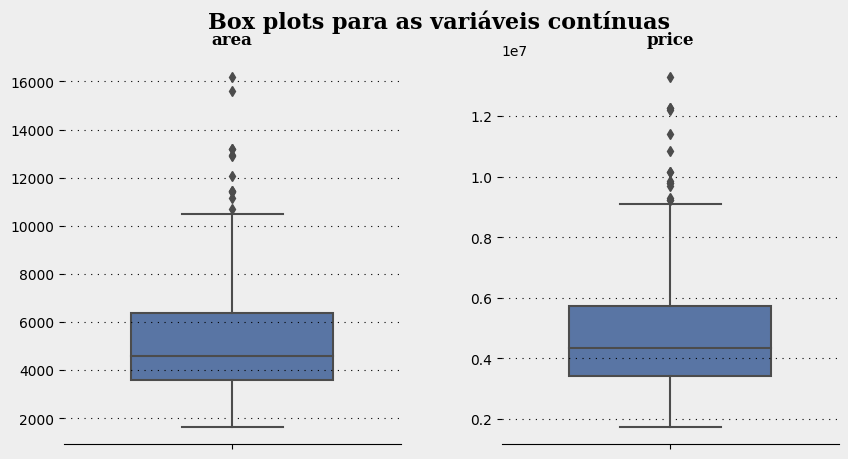

In [54]:
sns.set_palette("deep")
fig = plt.figure(figsize=(10,5))
grid_location = fig.add_gridspec(1,2)
grid_location.update(wspace=0.3, hspace=0.15)
background_color = "#eeeeee"
fig.patch.set_facecolor(background_color) 

ax = []

for i in range(len(continuos)):
    ax.append(fig.add_subplot(grid_location[0,i]))
    ax[i].set_facecolor(background_color) 
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)

# Box plot para cada uma das variaveis
for i in range(len(continuos)):
    ax[i].text(0.5, 1.05, continuos[i-1], fontsize=12, fontweight='bold', fontfamily='serif', color="#000000",
            horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes)
    ax[i].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.boxplot(ax=ax[i],y=dados[continuos[i-1]],width=0.6)
    ax[i].set_ylabel("")
    ax[i].spines["bottom"].set_visible(True)

fig.suptitle("Box plots para as variáveis contínuas",fontsize=16, fontweight='bold',fontfamily='serif', color="#000000")

Como visto, há uma pequena parcela de outliers, que serão mantidos nesse projeto

### Distribuição de frequências para a variável 'price' (variável dependente)

<Axes: xlabel='price', ylabel='Count'>

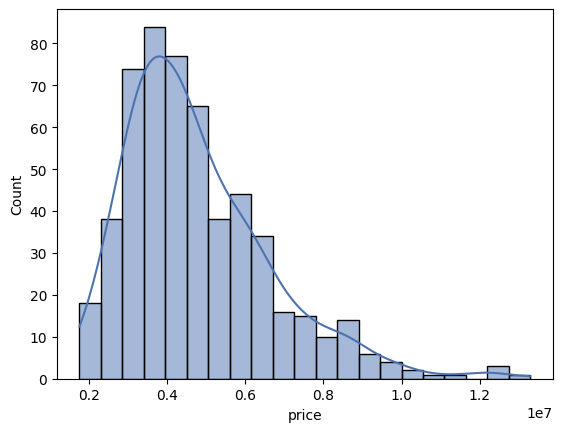

In [55]:
sns.histplot(dados['price'], kde=True)

### Gráfico de dispersão entre as variáveis (em relação a variável 'price')

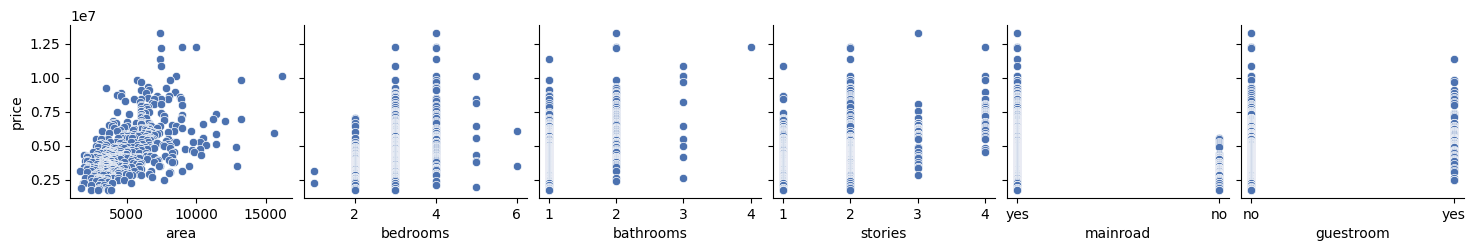

In [56]:
dados_visual_1 = dados[dados.columns[1:7]]
dados_visual_2 = dados[dados.columns[7:]]
sns.pairplot(dados, y_vars='price', x_vars=dados_visual_1)

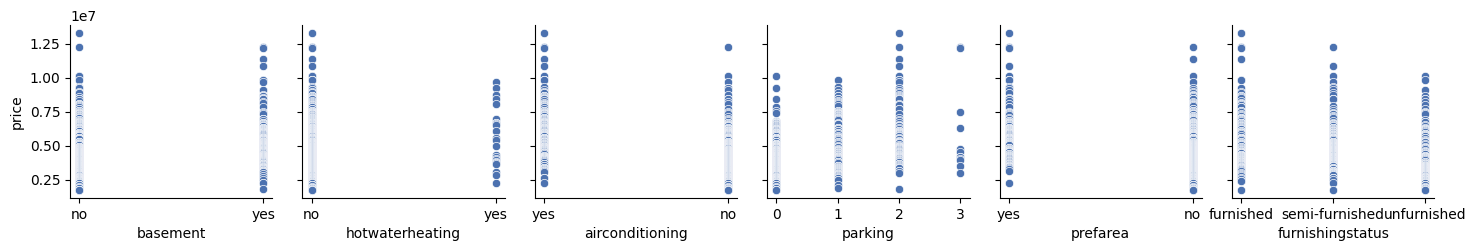

In [57]:
sns.pairplot(dados, y_vars='price', x_vars=dados_visual_2)

## Importando as bibliotecas para regressão

In [102]:
# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Pré-processamento dos dados

In [103]:
# Shuffle dataset
dados_aux = dados.sample(frac=1)

# Convert categorical columns into dummy/indicator variables
dados_aux = pd.get_dummies(dados_aux, columns = categoricos, drop_first = True)
dados_aux.head()

# Using scale
scaler = MinMaxScaler()
dados_aux[continuos] = scaler.fit_transform(dados_aux[continuos])

target_feature = 'price'

# Features
X = dados_aux.drop([target_feature],axis=1)

# Target
y = dados_aux[[target_feature]]

X.head()

,area,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,...,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
133,0.216495,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
148,0.323711,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
33,0.296220,False,True,False,False,False,False,True,False,True,...,True,True,False,False,True,False,False,False,False,True
492,0.068729,False,True,False,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
336,0.441924,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False


In [104]:
y.head()

,price
133,0.351515
148,0.333333
33,0.557576
492,0.090909
336,0.187879


## Divisão em dados de treino e teste

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=0)

## Linear regression

In [106]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('R² Score =',r2_score(y_test,y_pred))
print('MAE =', mean_absolute_error(y_test,y_pred))
print('MSE =',mean_squared_error(y_test,y_pred))

R² Score = 0.6781200777709393
MAE = 0.06469354001092215
MSE = 0.007081131486462049


## Considerações

Nesse projeto, após importar os dados, foi verificado que o dataset não possui dados nulos, nem duplicados.
Depois, foram criados gráficos do tipo "boxplot", de modo a verificar o comportamento das variáveis contínuas em relação aos quartis. Além disso, foi criado o gráfico de distribuição de frequências da variável dependente ("price"). Por fim, foram gerados gráficos de dispersão de todas as variáveis em relação a variável dependente ("price").
Antes da criação do modelo de regressão linear, foi realizado o pré-processamento dos dados. Finalmente, criou-se o modelo, com o qual se obteve os seguintes resultados

R² = 0.6781<br>MAE = 0.0647<br>MSE = 0.0071